## **Simple Linear Regression: Predicting House Prices**

**Objective:**

Your task is to build a **Linear Regression** model to predict the **price of a house** based on its size. This exercise will help you understand the relationship between variables and how to apply Linear Regression for real-world prediction tasks.

**Dataset:**

You will work with a dataset `data/housing.csv` containing the following columns:
- **price**: The price of the house in dollars.
- **area**: The size of the house in square feet.


Steps to Complete:

1. **Data Loading and Exploration**  
   - Visualize the relationship between **Size** and **Price** using a scatter plot.
   - Check for outliers, missing values, or anomalies in the dataset.

2. **Build a Linear Regression Model**  
   - Split the dataset into **training** and **test sets** (80% training, 20% testing).
   - Implement a **Simple Linear Regression** model using:
     - **Manual Calculation** (Optional): Derive the slope $m$ and intercept $b$ using the formulas for linear regression:
       $$
       m = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sum{(x_i - \bar{x})^2}}, \quad b = \bar{y} - m\bar{x}
       $$
     - **Scikit-learn**: Use `LinearRegression` from `sklearn.linear_model` to fit the model.

3. **Model Evaluation**  
   - Predict the test set house prices using the model.
   - Evaluate the model’s performance using:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **R² Score**
   - Interpret the slope ($m$) and intercept ($b$) of the linear equation.

4. **Visualization**  
   - Plot the **regression line** over the scatter plot of **area** vs. **price**.
   - Visualize the residuals (errors) between the actual and predicted house prices.

5. **Prediction**  
   - Use the trained model to predict the price of a house with a size of 1,000 square feet.
   - Discuss whether the prediction seems reasonable based on the dataset.


**Deliverables:**

- A Python script or Jupyter Notebook containing:
  - Data loading, preprocessing, and visualization.
  - Implementation of Simple Linear Regression.
  - Model evaluation and insights.
  - Predictions and their interpretation.
- A brief report discussing:
  - The relationship between **Size** and **Price**.
  - The limitations of using Linear Regression for this dataset.


**Useful Hints:**

- Use `numpy` for manual calculations and matrix operations.
- Use `pandas` for data manipulation and `matplotlib`/`seaborn` for visualizations.
- Experiment with data transformations (e.g., log or scaling) to improve results.

In [52]:
import pandas as pd

df = pd.read_csv("data/housing.csv")
df = df[["area", "price"]]

df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [53]:
df.shape

(545, 2)

In [54]:
X = df['area'].values
y = df['price'].values

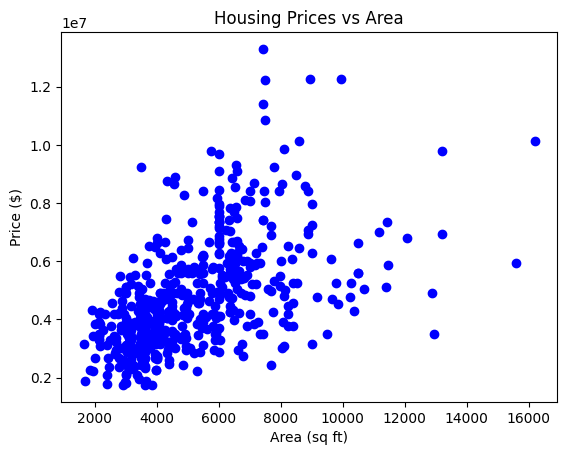

In [55]:
import matplotlib.pyplot as plt

plt.scatter(x=X, y=y, color='blue')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Housing Prices vs Area')
plt.show()

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)


In [57]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

m = model.coef_[0]
b = model.intercept_

print(f"Model equation: price = {m:.2f} * area + {b:.2f}")

Model equation: price = 425.73 * area + 2512254.26


In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2_s = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2_s:.2f}")

Mean Squared Error: 3675286604768.19
Root Mean Squared Error: 1917103.70
Mean Absolute Error: 1474748.13
R^2 Score: 0.27


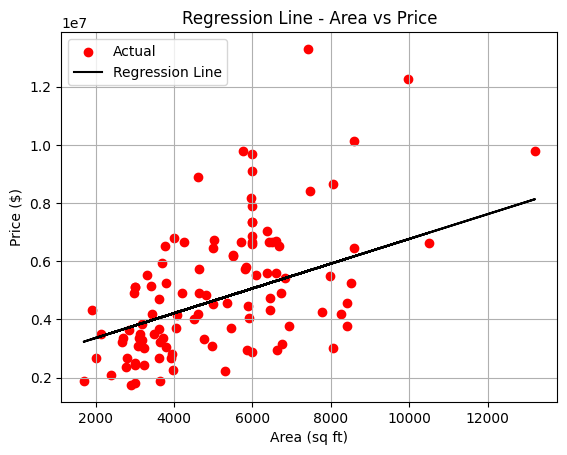

In [60]:
plt.scatter(x_test, y_test, color='red', label='Actual')
plt.plot(x_test, predictions, color='black', label='Regression Line')
plt.title('Regression Line - Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# Sample input

area = 1500

predicted_price = model.predict([[area]])
print(f"Predicted price for area {area} sq ft: ${predicted_price[0]:.2f}")

Predicted price for area 1500 sq ft: $3150849.03


In [63]:
import joblib

model_filename = "model/area_price_lr_model.pkl"
joblib.dump(model, model_filename)

['model/area_price_lr_model.pkl']